In [ ]:
# Summary/Review/One More Thing about regression

We have been doing what are known as REGRESSION models

A Regression task is when you try to predict a *continuous* variable using other variables.

# Linear Regression - A Review

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
#Review: Linear Regression Models
admissions = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [31]:
admissions.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## Question: Which columns are categorical and which are continuous?

## Regression

A Regression task is when you try to predict a *continuous* variable using other variables, which can be of any type.

In [ ]:
x,y = 7,6


In [69]:
train_test_split??

Signature: train_test_split(*arrays, **options)
Source:   
def train_test_split(*arrays, **options):
    """Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set 

In [33]:

from sklearn.model_selection import train_test_split
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [34]:
train, test = statsmodels_train_test_split(admissions)

# Let's try to model gre score versus the other variables, e.g.,
# gre ~ C(admit) + gpa'

# There is a deep connection between linear regression and the normal distribution. I'm going to mention it now, but not do anything with it yet.
# Here it is:

## When we do a linear regression of the form we wrote above, we are making the assumption that *gre* is distributed as a normal random variable!!!

In [61]:
# What are the value counts of gre in this dataset?

admissions['gre'].value_counts()

620    30
580    29
540    27
800    25
520    24
560    24
660    24
600    23
700    22
640    21
500    21
680    20
480    16
460    14
720    11
400    11
740    11
440    10
380     8
420     7
780     5
760     5
340     4
360     4
300     3
220     1
Name: gre, dtype: int64

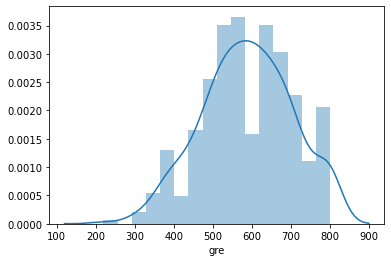

In [65]:
sns.distplot(admissions['gre'])

### Let's treat gre as continuous and normally distributed for now, though this is debatable!
### Also notice that all gre scores are greater than zero. This would usually be bad, since normal distributions centered at zero allow both positive and negative values with equal probability

### Since values of gre are generally not near zero and look vaguely normally distributed, we'll push forward with this analysis.

In [52]:
formula = 'gre ~ C(admit) + gpa'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     30.11
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.24e-12
Time:                        20:38:28   Log-Likelihood:                -1817.8
No. Observations:                 300   AIC:                             3642.
Df Residuals:                     297   BIC:                             3653.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       216.2298     53.231      4.062      0.000     111.472     320.988
C(admit)[T.1]    37.8320     13.248      2.856      0.005      11.760      63.904
gpa             105.2610     15.806      6.659      0.000      74.155     136.367
==============================================================================
Omnibus:                        0.155   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.264
Skew:                          -0.040   Prob(JB):                        0.876
Kurtosis:                       2.878   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
y_test_pred = lm.predict(test)
y_test_pred

210    567.801554
120    647.738004
299    574.117216
358    642.474954
398    600.432470
          ...    
313    638.264513
316    569.844851
42     585.634004
369    625.695115
141    624.580580
Length: 100, dtype: float64

### Discussion of R_squared and Adjusted R_squared

In [54]:
r2_score(test['gre'], y_test_pred)

0.12239433217408768

In [55]:
mean_squared_error(test['gre'], y_test_pred)

12548.88344424272

If I make a different model, my r-squared and mean_squared_error will be different
In general, if I add a variable I would expect my r-squared to go up.

**Adjusted R-Squared** is generally considered SUPERIOR to R-Squared, because it adjusts for the fact that you've added more variables, so only go up when you add a new variable AND the fit is a better!

In [56]:
formula = 'gre ~ C(admit) + gpa + C(rank)' # adds rank as a categorical variable
lm2 = smf.ols(formula=formula, data=train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     13.40
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           8.82e-12
Time:                        20:39:06   Log-Likelihood:                -1814.7
No. Observations:                 300   AIC:                             3641.
Df Residuals:                     294   BIC:                             3664.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       209.8145     56.264      3.729      0.000      99.084     320.545
C(admit)[T.1]    33.1256     13.708      2.417      0.016       6.148      60.104
C(rank)[T.2]     13.3080     17.965      0.741      0.459     -22.048      48.664
C(rank)[T.3]    -23.0318     18.914     -1.218      0.224     -60.255      14.192
C(rank)[T.4]     -4.9769     22.249     -0.224      0.823     -48.764      38.810
gpa             108.3309     15.847      6.836      0.000      77.144     139.518
==============================================================================
Omnibus:                        0.763   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.850
Skew:                          -0.041   Prob(JB):                        0.654
Kurtosis:                       2.752   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# we see that both R-Squared and Adjusted R-squared went up on the TRAINING data

In [68]:
#Let's check the test data
y_test_pred = lm2.predict(test)

r2_score(test['gre'], y_test_pred)


0.10453063162492138

In [ ]:
# so, r2_score went up. Adjusted r-squared went up as well, but not as much.